### Importações da lib Pandas e dos endpoints presentes na Api que serão necessários:

In [18]:
import pandas as pd

from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints.shotchartdetail import ClutchTimeNullable

### Coletando o ID do jogador desejado:

In [19]:
info_kyrie = players.find_players_by_full_name('Kyrie Irving')

print(info_kyrie)

[{'id': 202681, 'full_name': 'Kyrie Irving', 'first_name': 'Kyrie', 'last_name': 'Irving', 'is_active': True}]


### Visualizando o Dataframe referente a toda a carreira do jogador, com intuito de coletar o ID da temporada que iremos usar e o ID do seu time:

In [20]:
df_carreira = playercareerstats.PlayerCareerStats(player_id='202681') 

df_carreira.get_data_frames()[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,202681,2011-12,00,1610612739,CLE,20.0,51,51,1558.0,350,...,0.872,44,147,191,275,54,20,160,110,944
1,202681,2012-13,00,1610612739,CLE,21.0,59,59,2048.0,484,...,0.855,34,182,216,350,89,21,191,146,1325
2,202681,2013-14,00,1610612739,CLE,22.0,71,71,2496.0,532,...,0.861,52,207,259,433,108,23,190,163,1478
3,202681,2014-15,00,1610612739,CLE,23.0,75,75,2730.0,578,...,0.863,55,182,237,389,114,20,186,146,1628
4,202681,2015-16,00,1610612739,CLE,24.0,53,53,1667.0,394,...,0.885,44,113,157,250,56,18,124,107,1041
5,202681,2016-17,00,1610612739,CLE,25.0,72,72,2525.0,671,...,0.905,52,178,230,418,83,24,180,157,1816
6,202681,2017-18,00,1610612738,BOS,26.0,60,60,1931.0,534,...,0.889,33,194,227,306,65,17,139,122,1466
7,202681,2018-19,00,1610612738,BOS,27.0,67,67,2214.0,604,...,0.873,71,264,335,464,103,34,172,167,1596
8,202681,2019-20,00,1610612751,BKN,28.0,20,20,658.0,199,...,0.922,22,81,103,128,27,10,52,53,548
9,202681,2020-21,00,1610612751,BKN,29.0,54,54,1886.0,549,...,0.922,52,205,257,324,76,37,130,140,1451


#### Instanciando esse objeto para utilizar na coleta dos arremessos feitos apenas nos 2 minutos finais do jogo

In [21]:
clutch_time = ClutchTimeNullable()
ultimos_2_minutos = clutch_time.last_2_minutes

### Coletando o Dataframe dos arremessos, utilizando as informações encontradas acima

In [22]:
kyrie_shotchart_clutch = shotchartdetail.ShotChartDetail(player_id=202681, team_id=1610612742,
                                    season_type_all_star='Regular Season', season_nullable='2023-24', context_measure_simple='FGA', clutch_time_nullable=ultimos_2_minutos).get_data_frames()[0]

## Gerando a visualização dos arremessos:

### A imagem da quadra foi reutilizada de um repositório público do GitHub que contém MIT License.
##### [Link do repositório](https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb)

In [23]:
from desenhar_quadra import draw_court # coloquei a função em outro arquivo para não ocupar muito espaço.

### Filtrando os arremessos:

In [24]:
arremessos_certos_clutch = kyrie_shotchart_clutch.query('SHOT_MADE_FLAG == 1')
arremessos_errados_clutch = kyrie_shotchart_clutch.query('SHOT_MADE_FLAG == 0')

#### A visualização foi feita utilizando um gráfico de dispersão que foi posto em cima do desenho da quadra. 

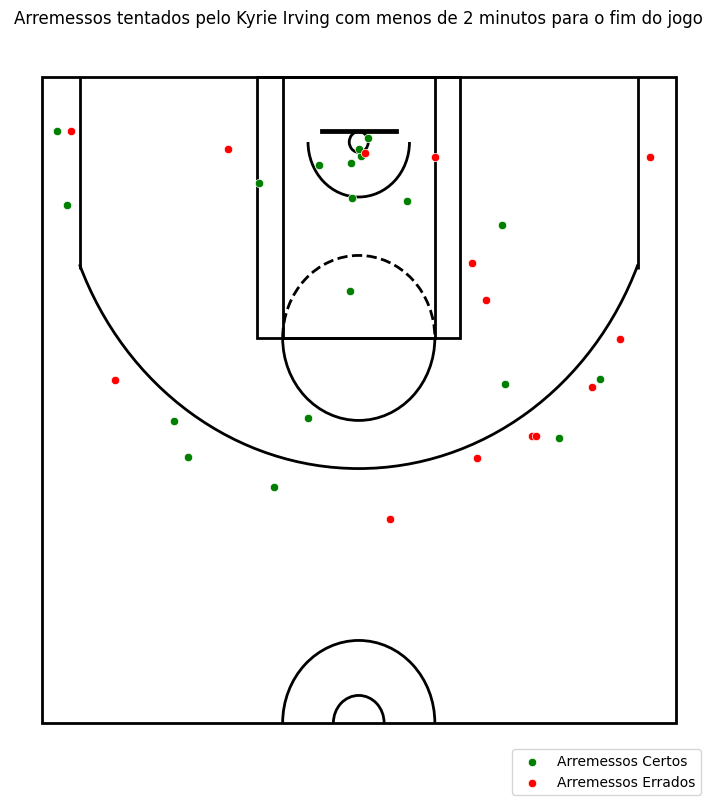

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 10))
plt.ylim(480, -80)

draw_court(outer_lines=True, color="black")
sns.scatterplot(x=arremessos_certos_clutch.LOC_X, y=arremessos_certos_clutch.LOC_Y, 
                data=kyrie_shotchart_clutch, color='green', label='Arremessos Certos')

sns.scatterplot(x=arremessos_errados_clutch.LOC_X, y=arremessos_errados_clutch.LOC_Y, 
                data=kyrie_shotchart_clutch, color='red', label='Arremessos Errados')

plt.title('Arremessos tentados pelo Kyrie Irving com menos de 2 minutos para o fim do jogo')
plt.legend(loc='lower right')
plt.axis('off')
plt.show()